## Тема: Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

__Задача:__ предсказание баллов ЕГЭ ученика

In [9]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [10]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

### 1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [11]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [12]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])
X_st

array([[ 1.        , -0.70710678, -0.97958969,  1.        ],
       [ 1.        , -0.70710678, -0.56713087,  1.        ],
       [ 1.        , -0.35355339, -0.46401617,  2.        ],
       [ 1.        ,  0.70710678, -0.77336028,  1.        ],
       [ 1.        ,  0.        ,  0.97958969,  2.        ],
       [ 1.        , -1.06066017, -0.36090146,  1.        ],
       [ 1.        ,  0.70710678,  1.08270439,  3.        ],
       [ 1.        ,  2.47487373,  2.11385144,  3.        ],
       [ 1.        , -0.70710678, -1.08270439,  1.        ],
       [ 1.        , -0.35355339,  0.05155735,  2.        ]])

In [13]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * dQ + dReg
        
    return W

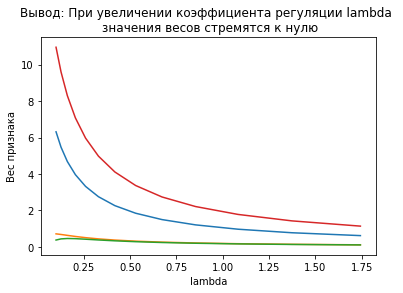

In [14]:
n = 30

coeff_list = []
lambda_list = np.logspace(-1, 2, n)

for i, val in enumerate(lambda_list):
    W = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=val)
    coeff_list.append(W)

plt.plot(lambda_list, coeff_list)

plt.title('Вывод: При увеличении коэффициента регуляции lambda \n значения весов стремятся к нулю')
plt.xlabel('lambda')
plt.ylabel('Вес признака');

### 2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [15]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W1 = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W1)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
#ИЗМЕНЕНО
#         dReg = reg * W1 # градиент регуляризации
        dReg = reg * W1/np.abs(W1)
#ИЗМЕНЕНО
        
        W1 -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W1}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W1))}')
    return W1

In [16]:
W1 = gradient_descent_reg_l1(X_st, y, iterations=15000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [-1.34270996  0.00832019  0.36472815  2.95025309], error 3462.4530421125396
Iter: 1500, weights: [30.56638915  6.18301034 -5.01234435 15.05996945], error 30.555391347414165
Iter: 3000, weights: [37.18094888  6.24288773 -2.354749   11.27860603], error 25.95438864292127
Iter: 4500, weights: [40.02912018  6.26388201 -1.20556694  9.65022797], error 25.10004480860628
Iter: 6000, weights: [41.25609707  6.2729207  -0.71049989  8.94873127], error 24.941267212567375
Iter: 7500, weights: [41.78467279  6.27681452 -0.49722739  8.64652987], error 24.91170376045879
Iter: 9000, weights: [42.01238066  6.27849196 -0.40535063  8.51634297], error 24.906175543987878
Iter: 10500, weights: [42.11047611  6.27921459 -0.36577056  8.46025908], error 24.905131629268887
Iter: 12000, weights: [42.15273515  6.2795259  -0.34871966  8.43609842], error 24.904930156294018
Iter: 13500, weights: [42.17094015  6.27966001 -0.34137421  8.42569012], error 24.904889432283518
Final MSE: 24.904880438374487


### 3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Нормализация

In [17]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

X_norm = X.copy().astype(np.float64)
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 2]

array([0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
       0.22580645, 0.67741935, 1.        , 0.        , 0.35483871])

Стандартизация 

In [18]:
def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

X_st = X.copy().astype(np.float64)
X_st[:, 2] = standart_scale(X_st[:, 2]) 
X_st[:, 2]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

Стандартизация нормализованных данных

In [19]:
X_st_norm = X_norm.copy()
X_st_norm[:,2] = standart_scale(X_st_norm[:,2])
X_st_norm[:,2]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

**Вывод:** применить сразу к одному и тому же признаку и нормализацию, и стандартизацию можно. Но имеет смыла, т.к. стандартизация приводит к одному и тому же результату. 

### 4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [20]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [21]:
# сгенерируем набор данных
X, Y, coef = datasets.make_regression(n_samples=10000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
display(X, Y, coef)

array([[-2.75161769e-01,  3.88051923e-01],
       [-7.39931870e-01,  6.41540019e-01],
       [ 1.73259956e+00,  1.38746003e+00],
       ...,
       [ 9.95690738e-02,  1.14050425e+00],
       [ 5.72821025e-01, -1.62061166e-03],
       [-8.10975181e-01, -7.90286210e-01]])

array([-14.05893282, -38.97475249,  86.53592019, ...,  10.32003217,
        29.28329989, -35.99295458])

array([47.46102593,  1.66486956])

In [24]:
# скорость обучения
eta = 0.01

# максимальное число итераций
max_iter = 1000

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-3

**Градиентный спуск**

In [25]:
%%time
# инициализируем начальный вектор весов
w = np.zeros(X.shape[1]) 

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# список произведенных операций
iter_nums = []

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    y_pred = np.dot(X, w)
    new_w = w - eta * (2 / Y.shape[0] * np.dot(X.T, y_pred - Y))
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    error = mserror(X, new_w, Y)
    
    w_list.append(new_w.copy())
    errors.append(error.copy())
    iter_nums.append(iter_num)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
errors = np.array(errors)
iter_nums = np.array(iter_nums)

print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

Iteration #0: W_new = [0.94093576 0.04602875], MSE = 2174.92
Iteration #100: W_new = [41.19041837  1.59716433], MSE = 64.38
Iteration #200: W_new = [46.63041829  1.65124522], MSE = 25.89
Iteration #300: W_new = [47.36621705  1.63899902], MSE = 25.19
Iter 344: error - 25.179049874139285, weights: [47.43265095  1.63650298]
В случае использования градиентного спуска функционал ошибки составляет 25.179
Wall time: 1.39 s


**Стахостический градиентный спуск**

In [26]:
%%time
# инициализируем начальный вектор весов
w_s = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list_s = [w.copy()]

# список значений ошибок после каждой итерации
errors_s = []

# список произведенных операций
iter_nums_s = []

# зададим начальную разницу весов большим числом
weight_dist_s = np.inf

# счетчик итераций
iter_num_s = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist_s > min_weight_dist and iter_num_s < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0], size=1)
    
    y_pred_s = np.dot(X[train_ind], w_s)
    new_w_s = w_s - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred_s - Y[train_ind])

    weight_dist_s = np.linalg.norm(new_w_s - w_s, ord=2)

    error_s = mserror(X, new_w_s, Y)
    
    w_list_s.append(new_w_s.copy())
    errors_s.append(error_s.copy())
    iter_nums_s.append(iter_num_s)
    
    if iter_num_s % 100 == 0:
        print(f'Iteration #{iter_num_s}: W_new = {new_w_s}, MSE = {round(error_s, 2)}')

    iter_num_s += 1
    w_s = new_w_s
    
w_list_s = np.array(w_list_s)
errors_s = np.array(errors_s)
iter_nums_s = np.array(iter_nums_s)

print(f'Iter {iter_num_s}: error - {error_s}, weights: {new_w_s}')
print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors_s[-1], 4)}')

Iteration #0: W_new = [ 0.00032916 -0.01709123], MSE = 2262.83
Iteration #100: W_new = [40.11077384  1.51748526], MSE = 79.02
Iteration #200: W_new = [46.76274185  1.6330557 ], MSE = 25.69
Iter 222: error - 26.3530644505948, weights: [46.83767711  2.50597989]
В случае использования стохастического градиентного спуска ошибка составляет 26.3531
Wall time: 977 ms


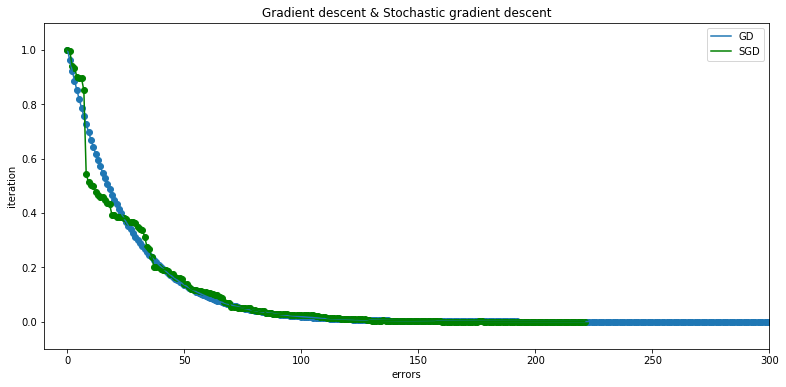

In [27]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent & Stochastic gradient descent')
plt.xlabel(r'errors')
plt.ylabel(r'iteration')
plt.ylim(-0.1, 1.1)
plt.xlim(-10, 300)

plt.scatter(iter_nums, min_max_scale(errors))
plt.plot(iter_nums, min_max_scale(errors), label='GD')

plt.scatter(iter_nums_s, min_max_scale(errors_s), c='g')
plt.plot(iter_nums_s, min_max_scale(errors_s), c='g', label='SGD')

plt.legend()
plt.show()

**Вывод**: на сгенерированных данных (2 параметра, 10000 строк) скорость сходимости метода Стахостический градиентный спуск (977 ms) значительно лучше, чем метода Градиентный спуск (1.39 s). 